# Network Data Science with NetworkX and Python

## Load graphs from Excel spreadsheet files

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from random import sample

In [9]:
link = ("https://github.com/dnllvrvz/Social-Network-Dataset/"
        "raw/master/Social%20Network%20Dataset.xlsx")

network_data = pd.read_excel(link, sheet_name=['Elements', 'Connections'])
elements_data = network_data['Elements'] # node list
connections_data = network_data['Connections'] # edge list
edge_cols = ['Type', 'Weight', 'When']
graph = nx.convert_matrix.from_pandas_edgelist(connections_data,
                                               source='From',
                                               target='To',
                                               edge_attr=edge_cols)

In [10]:
from random import sample
sampled_edges = sample(graph.edges, 10)

In [14]:
graph.edges[sampled_edges[0]]

{'Type': nan, 'Weight': 0.2, 'When': 2017.0}

In [11]:
elements_data = elements_data.drop_duplicates()

In [12]:
node_dict = elements_data.set_index('Label').to_dict(orient='index')
nx.set_node_attributes(graph, node_dict)

In [15]:
sampled_nodes = sample(graph.nodes, 10)

In [16]:
graph.nodes[sampled_nodes[0]]

{'Type': 'Student',
 'School (ID)': 34.0,
 'Answered the form': 'Yes',
 'Unnamed: 4': nan,
 'Unnamed: 5': nan,
 'Unnamed: 6': nan,
 'Unnamed: 7': nan,
 'Unnamed: 8': nan,
 'Unnamed: 9': nan,
 'Unnamed: 10': nan,
 'Unnamed: 11': nan,
 'Unnamed: 12': nan,
 'Unnamed: 13': nan,
 'Unnamed: 14': nan,
 'Unnamed: 15': nan,
 'Unnamed: 16': nan,
 'Unnamed: 17': nan,
 'Unnamed: 18': nan,
 'Unnamed: 19': nan,
 'Unnamed: 20': nan,
 'Unnamed: 21': nan,
 'Unnamed: 22': nan,
 'Unnamed: 23': nan,
 'Unnamed: 24': nan,
 'Unnamed: 25': nan}

## Visualize graphs with options and layouts

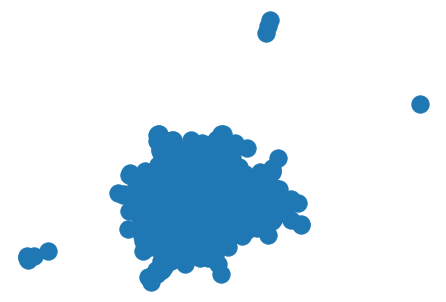

In [17]:
nx.draw(graph)

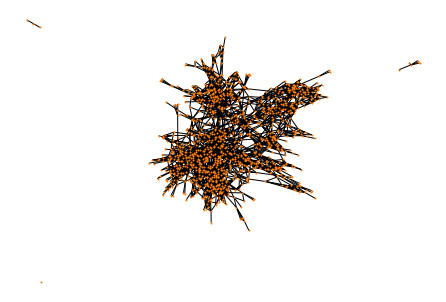

In [18]:
nx.draw(graph, 
        node_size=1,
        node_color='C1')

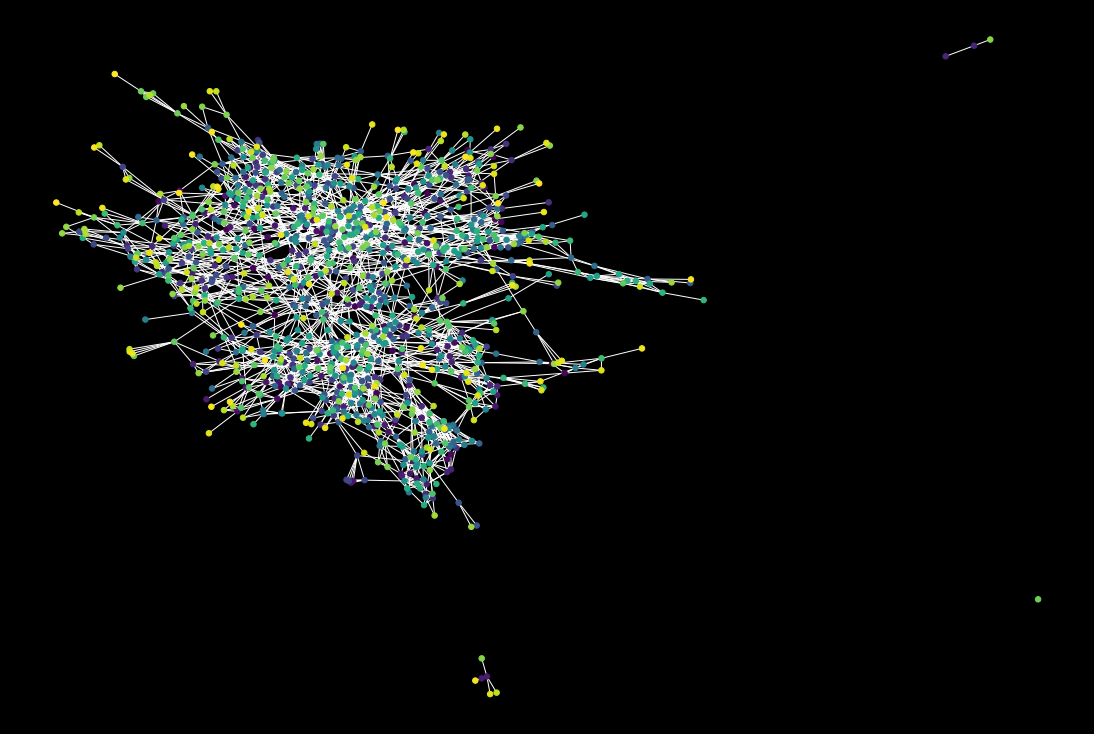

In [19]:
fig = plt.figure(figsize=(15, 10))
colors = np.linspace(0, 1, len(graph.nodes))
nx.draw(graph, 
        node_size=30,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('black')

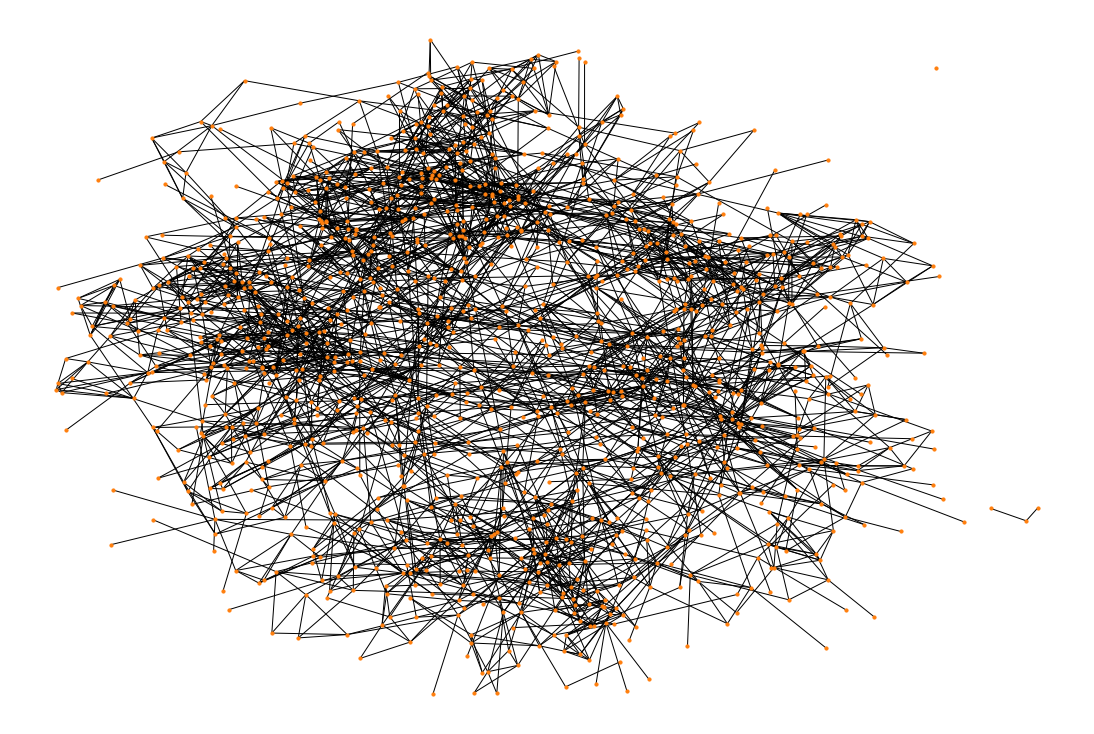

In [20]:
plt.figure(figsize=(15, 10))

k = 0.1
layout = nx.spring_layout(graph,
                          k=k)
nx.draw(graph,
        node_size=10,
        node_color='C1',
        pos=layout)

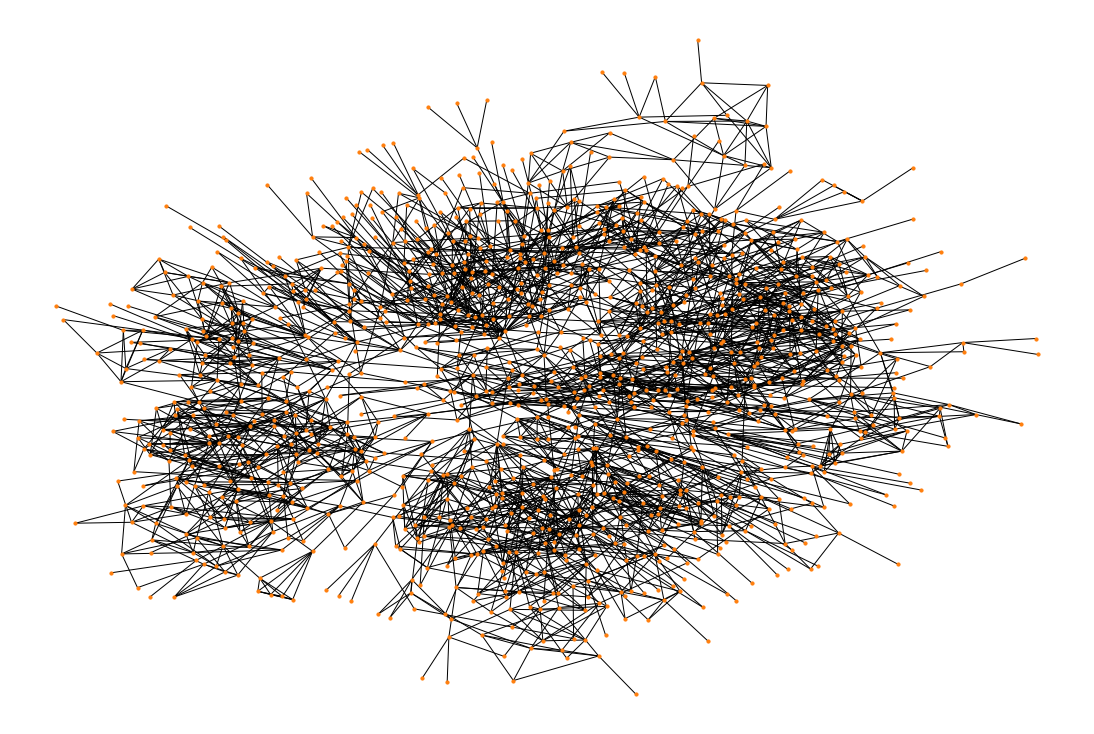

In [21]:
plt.figure(figsize=(15, 10))

layout = nx.kamada_kawai_layout(graph)

nx.draw(graph,
        node_size=10,
        node_color='C1',
        pos=layout)

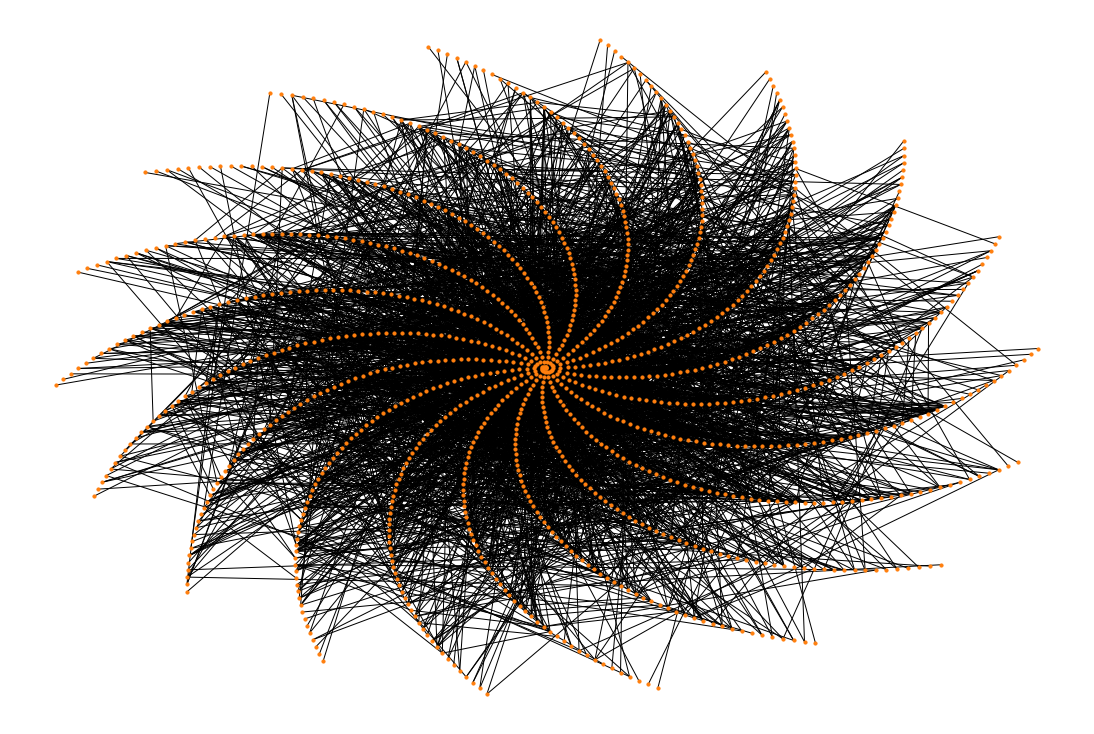

In [22]:
plt.figure(figsize=(15, 10))

layout = nx.spiral_layout(graph)

nx.draw(graph,
        node_size=10,
        node_color='C1',
        pos=layout)

## Summarize graphs through centrality metrics

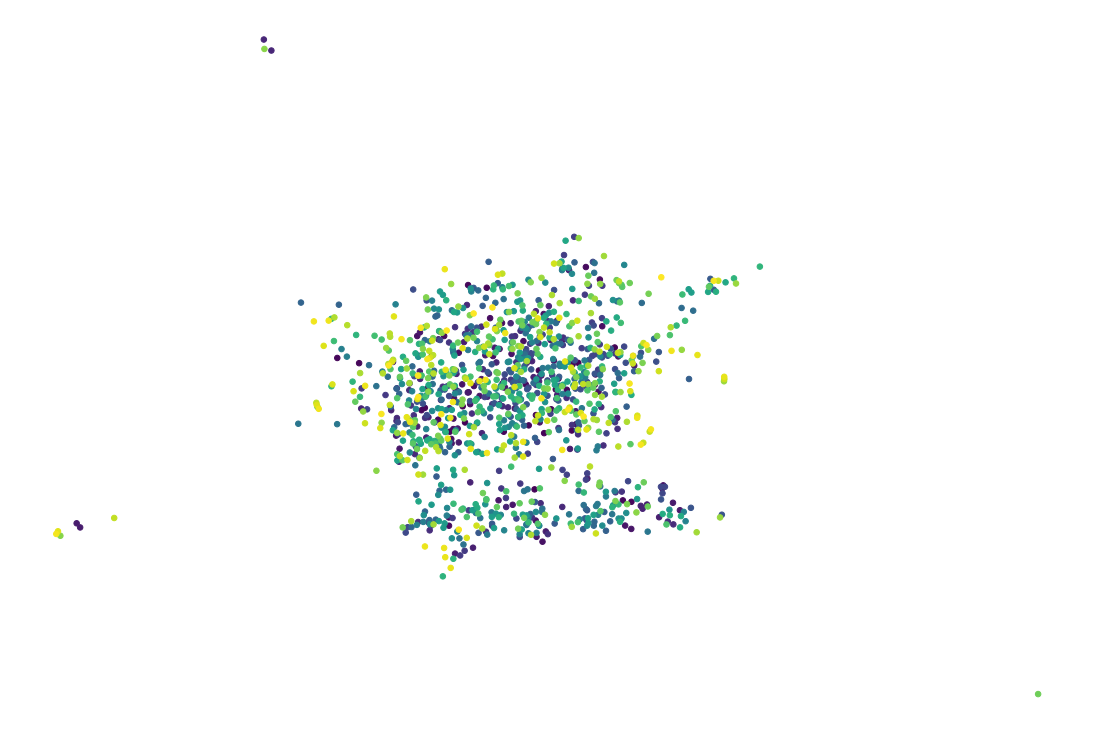

In [23]:
fig = plt.figure(figsize=(15, 10))
colors = np.linspace(0, 1, len(graph.nodes))
nx.draw(graph, 
        node_size=30,
        node_color=colors,
        edge_color='white')
#fig.set_facecolor('black')

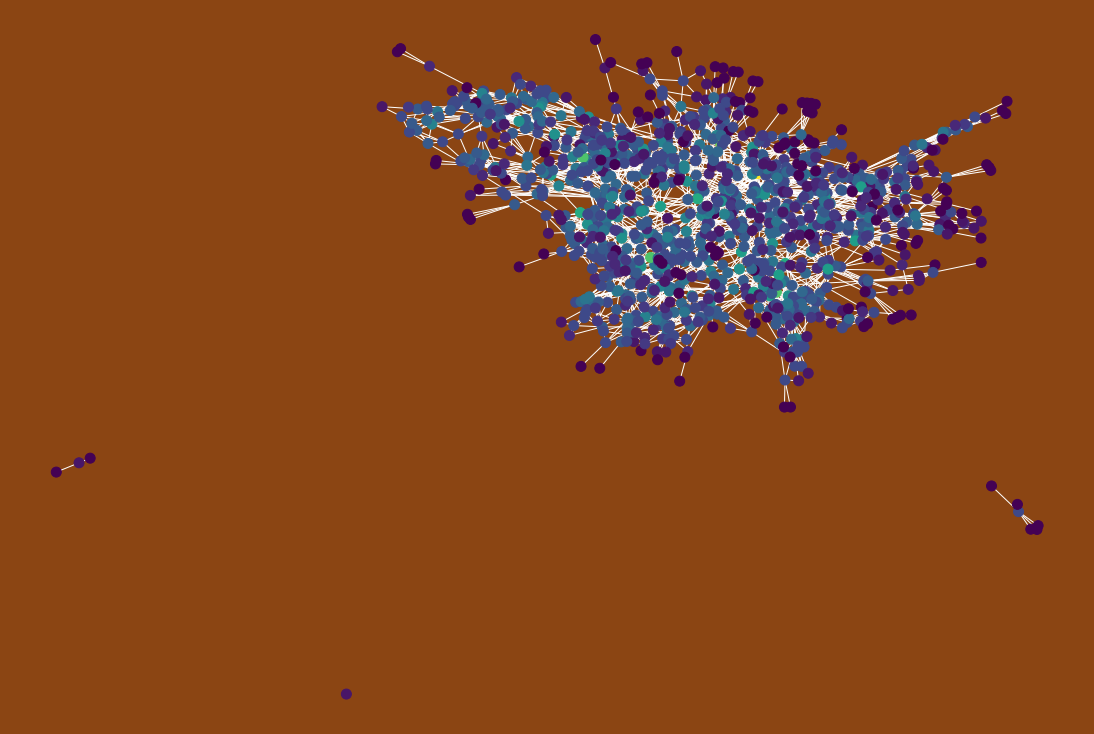

In [24]:
fig = plt.figure(figsize=(15, 10))


centrality = nx.degree_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size=100,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('SaddleBrown')

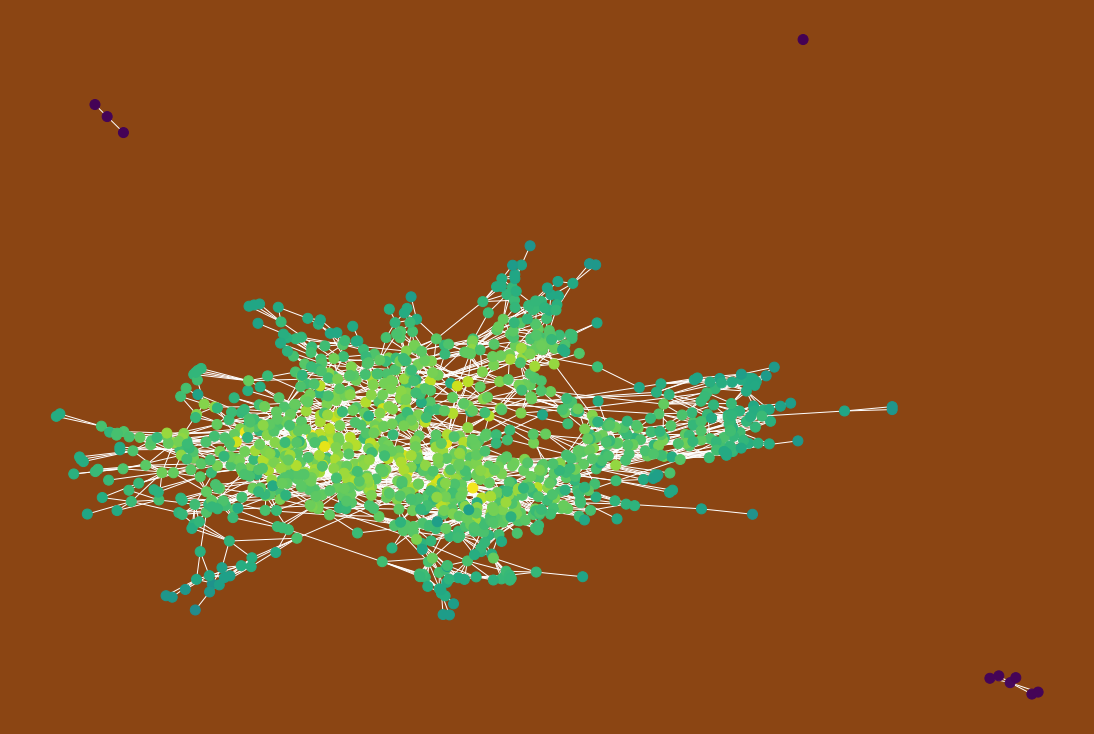

In [25]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.closeness_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size=100,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('SaddleBrown')

In [26]:
sample(centrality.items(), 10)

[('S-f81031', 0.1267117721748594),
 ('S-398c22', 0.19642766760808608),
 ('S-f981b4', 0.15076973149182527),
 ('S-94673d', 0.1500363405808307),
 ('S-07de1a', 0.16429547135091807),
 ('S-6b5a77', 0.16229353262495844),
 ('S-7815af', 0.15977152298493044),
 ('S-4fd2ed', 0.14994037260041573),
 ('S-1b9941', 0.18166210362948693),
 ('S-da17f6', 0.14097713406512505)]

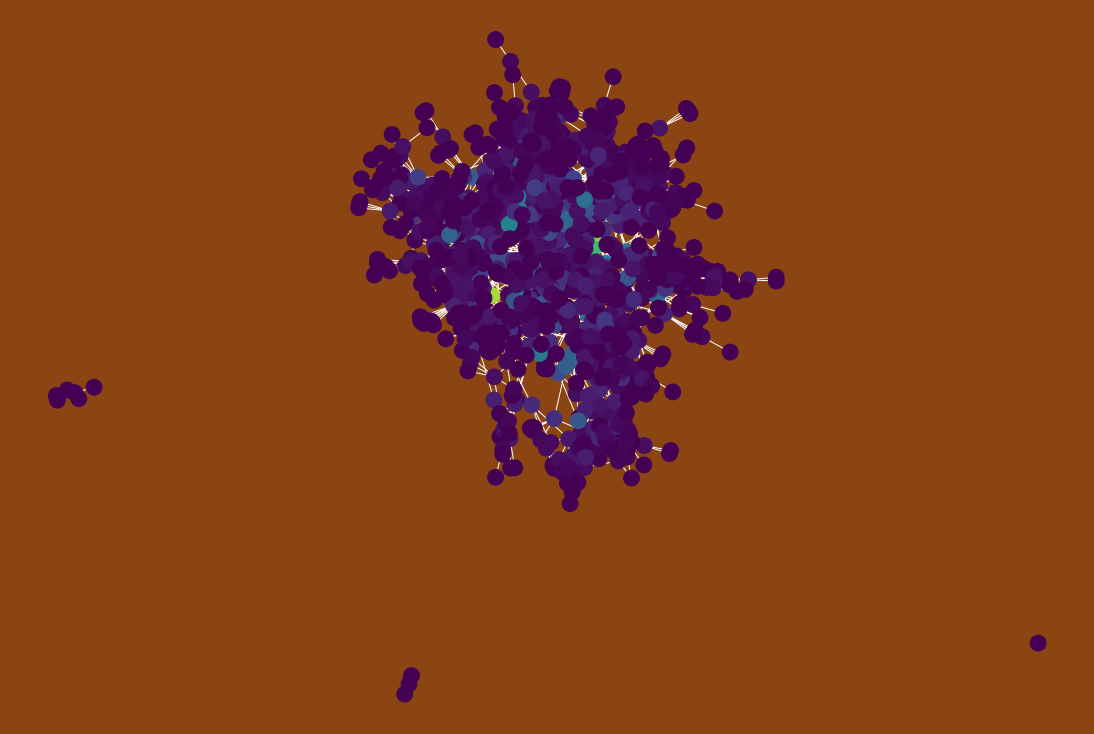

In [27]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.betweenness_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size=250,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('SaddleBrown')

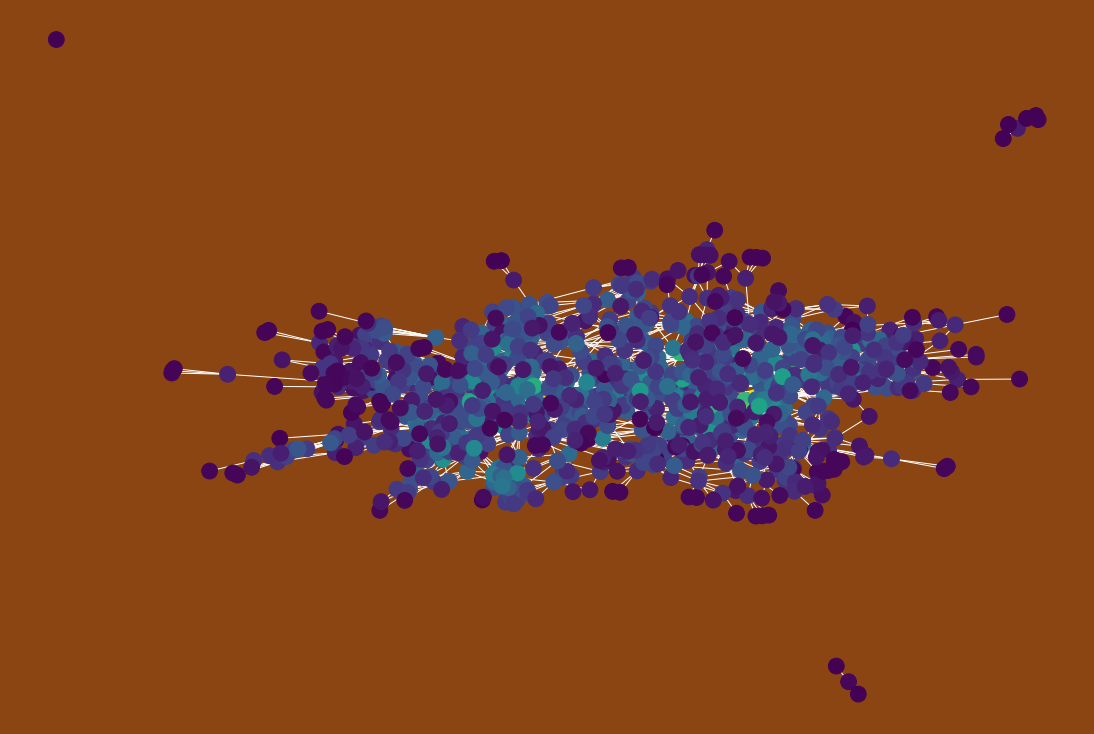

In [28]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.katz_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size=250,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('SaddleBrown')